<h1><center>Final Project</center></h1>
<h3><center>Zining Wang, Wenxuan Wang, Wenda Zheng</center></h3>   

First, we read and preprocess the data:

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
testID = test.Id
train.head()


print train.shape


# from collections import Counter
# Counter(train.MiscFeature)

# Adjust House Price based on CPI index, Convert to 2010 December dollars (CPI indices are from Bureau of Labor Statistics)
# train.ix[(train.YrSold == 2010) & 
#          ((train.MoSold == 7)|(train.MoSold == 6)|(train.MoSold <= 4)),
#          'SalePrice'] = train.SalePrice * 1.01
# train.ix[(train.YrSold == 2009) & 
#          ((train.MoSold == 1)|(train.MoSold == 6)|(train.MoSold <= 4)),
#          'SalePrice'] = train.SalePrice * 1.04
# train.ix[(train.YrSold == 2009) & 
#          ((train.MoSold == 2)|(train.MoSold == 3)|(train.MoSold == 4)),
#          'SalePrice'] = train.SalePrice * 1.03
# train.ix[(train.YrSold == 2009) & 
#          ((train.MoSold == 5)|(train.MoSold == 6)|(train.MoSold == 7)|(train.MoSold == 8)),
#          'SalePrice'] = train.SalePrice * 1.02
# train.ix[(train.YrSold == 2009) & 
#          ((train.MoSold >= 9)),
#          'SalePrice'] = train.SalePrice * 1.01
# train.ix[(train.YrSold == 2008) & 
#          ((train.MoSold == 1)|(train.MoSold == 12)),
#          'SalePrice'] = train.SalePrice * 1.04
# train.ix[(train.YrSold == 2008) & 
#          ((train.MoSold == 3)|(train.MoSold == 11)),
#          'SalePrice'] = train.SalePrice * 1.03
# train.ix[(train.YrSold == 2008) & 
#          ((train.MoSold == 5)|(train.MoSold == 10)),
#          'SalePrice'] = train.SalePrice * 1.01
# train.ix[(train.YrSold == 2007) & 
#          ((train.MoSold == 1)|(train.MoSold == 2)),
#          'SalePrice'] = train.SalePrice * 1.08
# train.ix[(train.YrSold == 2007) & 
#          ((train.MoSold == 3)),
#          'SalePrice'] = train.SalePrice * 1.07
# train.ix[(train.YrSold == 2007) & 
#          ((train.MoSold == 4)),
#          'SalePrice'] = train.SalePrice * 1.06
# train.ix[(train.YrSold == 2007) & 
#          ((train.MoSold == 5)|(train.MoSold == 6)|(train.MoSold == 7)|(train.MoSold == 8)|(train.MoSold == 9)|(train.MoSold == 10)),
#          'SalePrice'] = train.SalePrice * 1.05
# train.ix[(train.YrSold == 2007) & 
#          ((train.MoSold == 11)|(train.MoSold == 12)),
#          'SalePrice'] = train.SalePrice * 1.04
# train.ix[(train.YrSold == 2006) & 
#          ((train.MoSold == 1)),
#          'SalePrice'] = train.SalePrice * 1.11
# train.ix[(train.YrSold == 2006) & 
#          ((train.MoSold == 2)|(train.MoSold == 3)),
#          'SalePrice'] = train.SalePrice * 1.10
# train.ix[(train.YrSold == 2006) & 
#          ((train.MoSold == 4)|(train.MoSold >= 10)),
#          'SalePrice'] = train.SalePrice * 1.09
# train.ix[(train.YrSold == 2006) & 
#          ((train.MoSold == 5)|(train.MoSold == 6)|(train.MoSold == 7)|(train.MoSold == 9)),
#          'SalePrice'] = train.SalePrice * 1.08
# train.ix[(train.YrSold == 2006) & 
#          ((train.MoSold == 8)),
#          'SalePrice'] = train.SalePrice * 1.07


# Converting features and filling missing values...
train['MSSubClass'] = train['MSSubClass'].astype(str)
test['MSSubClass'] = test['MSSubClass'].astype(str)
test['MSZoning'] = test['MSZoning'].fillna(train['MSZoning'].mode()[0])
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
test['LotFrontage'] = test['LotFrontage'].fillna(train['LotFrontage'].mean())
train['Alley'] = train['Alley'].fillna('NoAlleyAccess')
test['Alley'] = test['Alley'].fillna('NoAlleyAccess')
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
test['MasVnrType'] = test['MasVnrType'].fillna(train['MasVnrType'].mode()[0])


# Impute test data with the most common category
for col in ('BsmtFullBath','BsmtHalfBath','Exterior1st','Exterior2nd','Functional'):
    test[col] = test[col].fillna(train[col].mode()[0])
# Impute test data with mean
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(train['BsmtUnfSF'].mean())
    
train['Fence'] = train['Fence'].fillna('NoFence')    
test['Fence'] = test['Fence'].fillna('NoFence')




for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('NoBasement')
    test[col] = test[col].fillna('NoBasement')
for col in ('BsmtFinSF1','BsmtFinSF2'):
    test[col] = test[col].fillna(0.0)
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(0)
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
test['KitchenQual'] = test['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
train['FireplaceQu'] = train['FireplaceQu'].fillna('NoFirePlace')
test['FireplaceQu'] = test['FireplaceQu'].fillna('NoFirePlace')
train['PoolQC'] = train['PoolQC'].fillna('NoPool')
test['PoolQC'] = test['PoolQC'].fillna('NoPool')
train['MiscFeature'] = train['MiscFeature'].fillna('NoMisc')
test['MiscFeature'] = test['PoolQC'].fillna('NoMisc')


for col in ('GarageType', 'GarageFinish', 'GarageQual','GarageCond','GarageYrBlt'):
    train[col] = train[col].fillna('NoGarage')
    test[col] = test[col].fillna('NoGarage')
test['GarageCars'] = test['GarageCars'].fillna(0.0)
test['GarageArea'] = test['GarageArea'].fillna(0.0)

train['MasVnrArea'] = train['MasVnrArea'].fillna(0.0)
test['MasVnrArea'] = test['MasVnrArea'].fillna(0.0)




train['YrSold'] = train['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)


test['SaleType'] = test['SaleType'].fillna(train['SaleType'].mode()[0])




train = train.drop('Id',1)
test = test.drop('Id',1)
train = train.drop('Utilities',1)
test = test.drop('Utilities',1)

#print train.SalePrice

trainX = train.drop('SalePrice',1)
trainY = train.SalePrice
testX = test

train.head()

(1460, 81)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NoAlleyAccess,Reg,Lvl,Inside,Gtl,...,0,NoPool,NoFence,NoMisc,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NoAlleyAccess,Reg,Lvl,FR2,Gtl,...,0,NoPool,NoFence,NoMisc,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NoAlleyAccess,IR1,Lvl,Inside,Gtl,...,0,NoPool,NoFence,NoMisc,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NoAlleyAccess,IR1,Lvl,Corner,Gtl,...,0,NoPool,NoFence,NoMisc,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NoAlleyAccess,IR1,Lvl,FR2,Gtl,...,0,NoPool,NoFence,NoMisc,0,12,2008,WD,Normal,250000


Dummy code all categorical variables(46 out of 79 variables are categorical)

In [47]:
#print train.LotArea.dtype
count = 0
train_len = len(train)
alldata = pd.concat(objs=[trainX, testX], axis=0)
for col in alldata.columns:
    if alldata[col].dtype != 'int64' and alldata[col].dtype != 'float64':
        #count += 1
        #print 'The attribute', col, 'is',alldata[col].dtype, ' not numerical types. So we will drop it..'
        
        # concatenate the dummy variables and drop the duplicates
        alldata = pd.concat([alldata,pd.get_dummies(alldata[col]).iloc[:, 1:]], axis=1)
        alldata = alldata.drop(col,1)
        
    else:
        # Normalize the data

        Xmin = min(alldata[:train_len][col])
        Xmax = max(alldata[:train_len][col])
        alldata[col] = [(x - Xmin+0.0)/(Xmax - Xmin) for x in alldata[col]]
# train_preprocessed = dataset_preprocessed[:train_objs_num]
# test_preprocessed = dataset_preprocessed[train_objs_num:]
#print count
trainX = alldata[:train_len]
testX = alldata[train_len:]





print alldata.columns
alldata.head()

Index([ u'LotFrontage',      u'LotArea',  u'OverallQual',  u'OverallCond',
          u'YearBuilt', u'YearRemodAdd',   u'MasVnrArea',   u'BsmtFinSF1',
         u'BsmtFinSF2',    u'BsmtUnfSF',
       ...
              u'ConLI',        u'ConLw',          u'New',          u'Oth',
                 u'WD',      u'AdjLand',       u'Alloca',       u'Family',
             u'Normal',      u'Partial'],
      dtype='object', length=407)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,...,0,0,0,0,1,0,0,0,1,0
1,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,...,0,0,0,0,1,0,0,0,1,0
2,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,...,0,0,0,0,1,0,0,0,1,0
3,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,...,0,0,0,0,1,0,0,0,0,0
4,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,...,0,0,0,0,1,0,0,0,1,0


Do some basic plots to see correlations

Run Regularized Linear Regression on the selected attributes. We evaluate scoring metrics using mean squared error.

usual rule: alpha = 109.854114 
one stand error rule: alpha = 159.985872


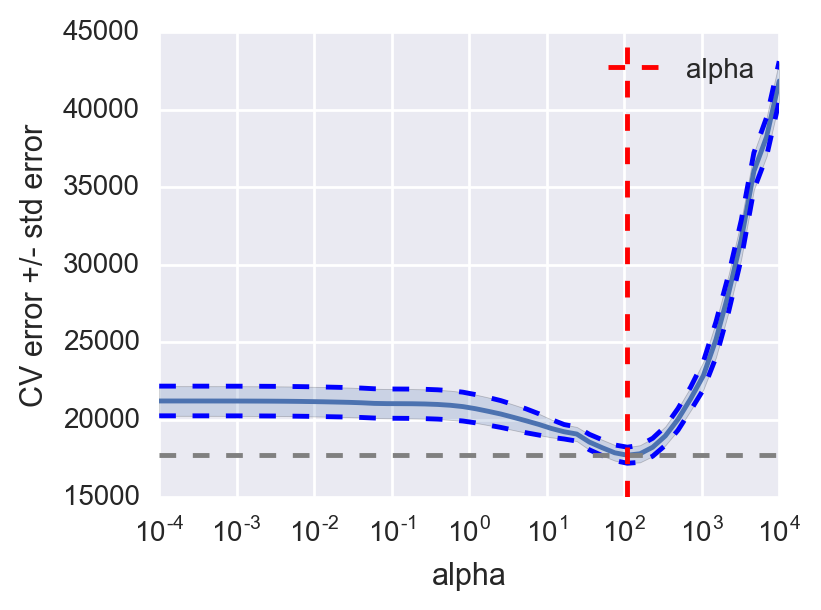

In [48]:
# function to estimate alpha using cross validation
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut




def estimate_alpha(alpha_list, n_folds):
    scores = list()
    scores_std = list()
    min_score = 100000
    # run the the list of alphas
    for alpha in alpha_list:
        lassoModel = linear_model.Lasso(alpha=alpha)
        this_scores = -cross_val_score(lassoModel, trainX, trainY, scoring="neg_mean_absolute_error", cv=n_folds, n_jobs=1)
        scores.append(np.mean(this_scores))
        scores_std.append(np.std(this_scores)) 
        
    # find the minimum of the scores and the index
    
    optAlphaIdx = np.argmin(scores)
    optAlpha = alpha_list[optAlphaIdx]
    lowerBound = scores[optAlphaIdx] + (scores_std[optAlphaIdx]/np.sqrt(n_folds))
    # get the smallest alpha within +/- std error
    for i, alpha in enumerate(alpha_list):
        if scores[i] <= lowerBound and i>optAlphaIdx:
            oneStdAlpha = alpha
            
            break
    return scores, scores_std, optAlpha, oneStdAlpha

# function to plot the cross-validation error curve
def plot_cv_curve(alphas, scores, scores_std, optAlpha, n_folds):
    scores, scores_std = np.array(scores), np.array(scores_std)
    plt.figure().set_size_inches(4, 3)
    plt.semilogx(alphas, scores)

    # plot error lines showing +/- std. errors of the scores
    std_error = scores_std / np.sqrt(n_folds)

    plt.semilogx(alphas, scores + std_error, 'b--')
    plt.semilogx(alphas, scores - std_error, 'b--')

    # alpha=0.2 controls the translucency of the fill color
    plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)
    plt.ylabel('CV error +/- std error')
    plt.xlabel('alpha')
    plt.axhline(np.min(scores), linestyle='--', color='.5')
    plt.axvline(optAlpha, linestyle='--', color='r', label='alpha')
    plt.legend()
    plt.xlim([alphas[0], alphas[-1]])

    
alphas = np.logspace(-4, 4, 50)
scores, scores_std, k5optalpha, k5osralpha = estimate_alpha(alphas, 5)
print ("usual rule: alpha = %f \none stand error rule: alpha = %f"%(k5optalpha,k5osralpha))

plot_cv_curve(alphas, scores, scores_std, k5optalpha, 5)

Use the alpha from CV to do the regression for test set:

In [50]:
lassoModel = linear_model.Lasso(alpha=k5optalpha)
lassoModel.fit(trainX,trainY)
preds = lassoModel.predict(testX)

preds[preds<0] = 100000


# Convert back based on CPI (but we got worse score in Kaggle (0.15447), so maybe we should not convert it back(got 0.15087))
# multi = np.repeat(1.0, len(testID))
# for i,id in enumerate(testID):
#     year = test.loc[i]['YrSold']
#     mo = test.loc[i]['MoSold']
    
#     if year == 2010 :
#         if (mo == 7) or (mo ==6) or (mo<=4):
#             multi[i] /=1.01  
#     elif year == 2009:
#         if (mo ==1) or (mo ==6) or(mo<=4):
#             multi[i] /= 1.04
#         elif (mo==2) or(mo==3) or (mo==4):
#             multi[i] /= 1.03
#         elif (mo==5)or(mo==6)or(mo==7)or(mo==8):
#              multi[i] /=1.02
#         elif mo >=9:
#              multi[i] /= 1.01
#     elif year ==2008:
#         if (mo ==1) or (mo ==12):
#             multi[i] /= 1.04
#         elif (mo==3) or(mo==11):
#             multi[i] /= 1.03
#         elif (mo==5)or(mo==10):
#              multi[i] /=1.01
#     elif year ==2007:
#         if (mo ==1) or (mo ==2):
#             multi[i] /= 1.08
#         elif (mo==3):
#             multi[i] /= 1.07
#         elif (mo==4):
#              multi[i] /=1.06
#         elif (mo>=5)and (mo<=10):
#             multi[i] /= 1.05
#         elif (mo>10):
#              multi[i] /=1.04
#     elif year ==2006:
#         if (mo ==1):
#             multi[i] /= 1.11
#         elif (mo==2) or (mo==3):
#             multi[i] /= 1.10
#         elif (mo==4) or (mo>-10):
#              multi[i] /=1.09
#         elif ((mo>=5)and (mo<=7)) or (m0==9):
#             multi[i] /= 1.08
#         elif (mo==8):
#              multi[i] /=1.07
        
# preds = preds*multi 

In [51]:
solution = pd.DataFrame({"Id":testID, "SalePrice":preds})
solution.to_csv("lasso_sol.csv", columns=["Id","SalePrice"], index = False)

In [44]:

for i in alldata.columns:
    print i

LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
150
160
180
190
20
30
40
45
50
60
70
75
80
85
90
FV
RH
RL
RM
Pave
NoAlleyAccess
Pave
IR2
IR3
Reg
HLS
Low
Lvl
CulDSac
FR2
FR3
Inside
Mod
Sev
Blueste
BrDale
BrkSide
ClearCr
CollgCr
Crawfor
Edwards
Gilbert
IDOTRR
MeadowV
Mitchel
NAmes
NPkVill
NWAmes
NoRidge
NridgHt
OldTown
SWISU
Sawyer
SawyerW
Somerst
StoneBr
Timber
Veenker
Feedr
Norm
PosA
PosN
RRAe
RRAn
RRNe
RRNn
Feedr
Norm
PosA
PosN
RRAe
RRAn
RRNn
2fmCon
Duplex
Twnhs
TwnhsE
1.5Unf
1Story
2.5Fin
2.5Unf
2Story
SFoyer
SLvl
Gable
Gambrel
Hip
Mansard
Shed
CompShg
Membran
Metal
Roll
Tar&Grv
WdShake
WdShngl
AsphShn
BrkComm
BrkFace
CBlock
CemntBd
HdBoard
ImStucc
MetalSd
Plywood
Stone
Stucco
Vinyl

In [52]:
trainX

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,0.064212,...,0,0,0,0,1,0,0,0,1,0
1,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,0.121575,...,0,0,0,0,1,0,0,0,1,0
2,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,0.185788,...,0,0,0,0,1,0,0,0,1,0
3,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,0.231164,...,0,0,0,0,1,0,0,0,0,0
4,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,0.209760,...,0,0,0,0,1,0,0,0,1,0
5,0.219178,0.059899,0.444444,0.500,0.876812,0.750000,0.000000,0.129695,0.000000,0.027397,...,0,0,0,0,1,0,0,0,1,0
6,0.184932,0.041057,0.777778,0.500,0.956522,0.916667,0.116250,0.242558,0.000000,0.135702,...,0,0,0,0,1,0,0,0,1,0
7,0.167979,0.042450,0.666667,0.625,0.731884,0.383333,0.150000,0.152197,0.021710,0.092466,...,0,0,0,0,1,0,0,0,1,0
8,0.102740,0.022529,0.666667,0.500,0.427536,0.000000,0.000000,0.000000,0.000000,0.407534,...,0,0,0,0,1,0,0,0,0,0
9,0.099315,0.028605,0.444444,0.625,0.485507,0.000000,0.000000,0.150780,0.000000,0.059932,...,0,0,0,0,1,0,0,0,1,0
